Use atleast 5 to 6 million data to use it in real life time scenario

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 62A3-3A7F

 Directory of C:\Users\Jasrotia\Desktop\Logistic regression - Diabities prediction project

10/05/2019  07:12 PM    <DIR>          .
10/05/2019  07:12 PM    <DIR>          ..
10/05/2019  07:06 PM    <DIR>          .ipynb_checkpoints
10/05/2019  07:12 PM           174,799 Diabetes prediction using Logistic regression .ipynb
06/24/2019  04:38 PM            23,873 diabetes_data.csv
               2 File(s)        198,672 bytes
               3 Dir(s)   6,313,549,824 bytes free


In [3]:
df1=pd.read_csv('diabetes_data.csv')

df1.head()

In [4]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


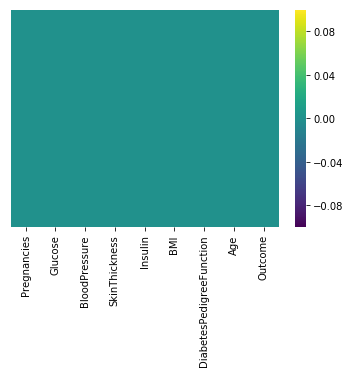

In [5]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap='viridis')

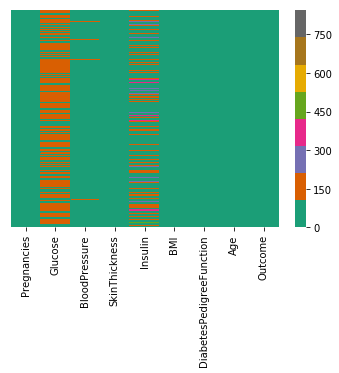

In [6]:
sns.heatmap(df1,yticklabels=False,cmap='Dark2')

In [7]:
sns.set_style('whitegrid')

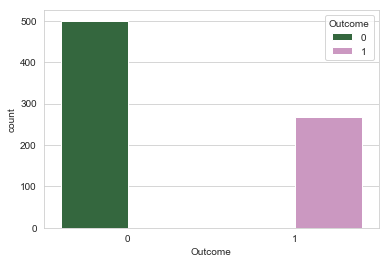

In [8]:
sns.countplot(x='Outcome',hue='Outcome',data=df1,palette='cubehelix')

Text(0.5, 0, 'Outcome')

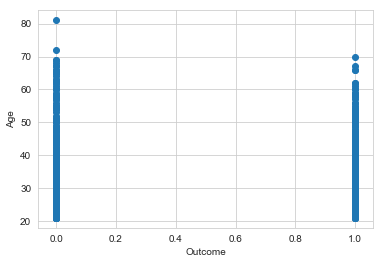

In [9]:
plt.scatter(x='Outcome',y='Age',data=df1)
plt.ylabel('Age')
plt.xlabel('Outcome')

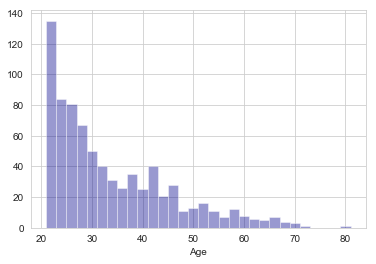

In [10]:
sns.distplot(df1['Age'],kde=False,color='darkblue',bins=30) 
# if kde=true then we will see gaussian distribution curve also

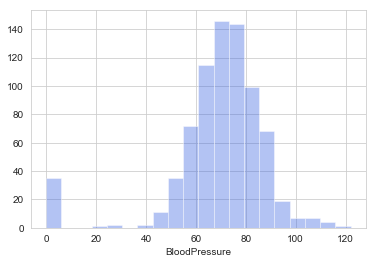

In [11]:
sns.distplot(df1['BloodPressure'],kde=False,color='royalblue',bins=20)

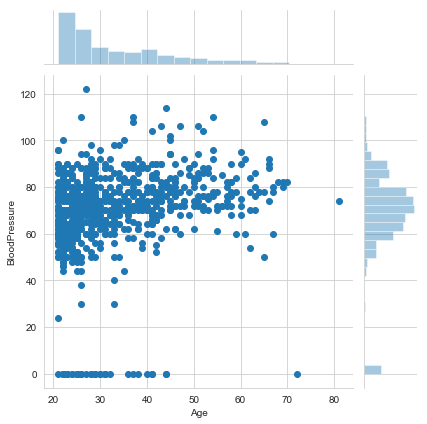

In [12]:
sns.jointplot(x='Age',y='BloodPressure',data=df1)

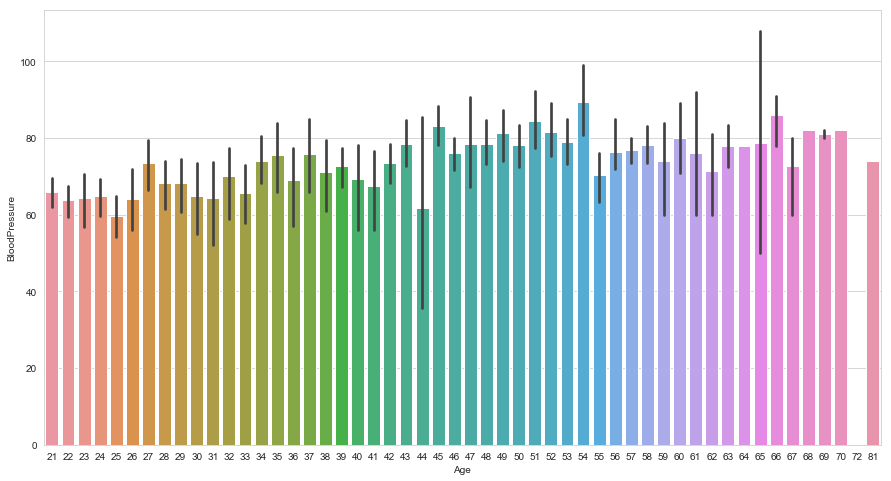

In [13]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x='Age',y='BloodPressure',data=df1)

In [14]:
!pip install cufflinks

In [15]:
import cufflinks as cf
cf.go_offline()

In [16]:
df1['BMI'].iplot(kind='hist',bins=40,color='red')

In [17]:
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [18]:
y=['Output']

In [19]:
df2=pd.DataFrame(data=df1)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Building the Logestic Regression Model

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis=1),
                                               df1['Outcome'],test_size=0.20,random_state=101)

In [21]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126,60,0,0,30.1,0.349,47
748,3,187,70,22,200,36.4,0.408,36
42,7,106,92,18,0,22.7,0.235,48
485,0,135,68,42,250,42.3,0.365,24
543,4,84,90,23,56,39.5,0.159,25


## Training and Prediction

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LRModel=LogisticRegression()

In [24]:
LRModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Testing out model

In [25]:
predictions_diabetes=LRModel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions_diabetes))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.70      0.65      0.67        51

   micro avg       0.79      0.79      0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



In [28]:
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[1,130,126,60,30,30.1,0.349,47]
Sahil=pd.DataFrame([data],columns=x)
Sahil.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,130,126,60,30,30.1,0.349,47


In [29]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
predictions_diabetes=LRModel.predict(Sahil)

In [31]:
print(predictions_diabetes) 
# if answer=0 then will not suffer from diabities in next 2 years, if answer=1 then it will suffer from diabities

[0]
